LAB-3

สร้างและแสดงผล Decision Tree
วัตถุประสงค์: ทำความเข้าใจวิธีการสร้างและตีความ Decision Tree แบบพื้นฐาน

สิ่งที่ต้องทำ:

1.โหลดและเตรียมข้อมูล (ครั้งนี้ ไม่ต้องทำ Feature Scaling ซึ่งเป็นหนึ่งในข้อดีของ Tree-based model)

2.แบ่งข้อมูลเป็น Train/Test set

3.เทรนโมเดล DecisionTreeClassifier จาก scikit-learn

4.วัดค่า Accuracy

5.ขั้นตอนสำคัญ: ใช้ sklearn.tree.plot_tree เพื่อวาดรูปต้นไม้ที่เทรนเสร็จแล้วออกมาดู

ตอบคำถาม: จากรูปที่วาดได้ "คำถามแรก" ที่ Root Node ใช้ในการแบ่งข้อมูลคืออะไร?


In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [23]:
import pandas as pd

ds = load_breast_cancer()
df = pd.DataFrame(data=ds.data, columns=ds.feature_names)
df['target'] = ds.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [24]:
from sklearn.metrics import accuracy_score

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy is : {accuracy}')

accuracy is : 0.9370629370629371


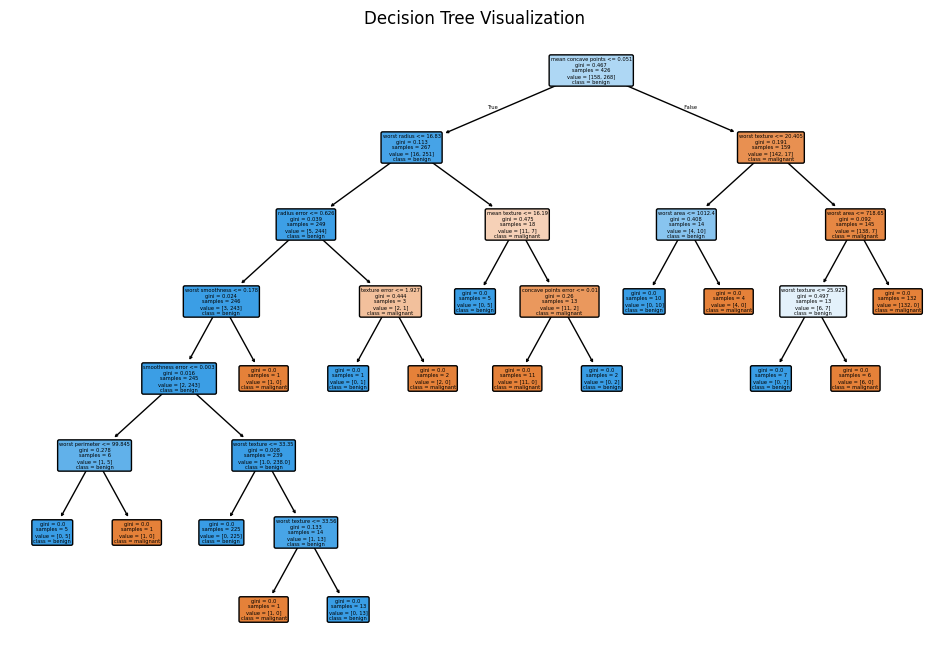

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, feature_names=ds.feature_names, class_names=ds.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()